In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results write to the current directory and are saved as output.

/kaggle/input/marketing.csv


In [2]:
# Import libraries 

import seaborn as sns 
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("../input/marketing.csv")

In [4]:
# Check first rows 
data.head() 

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained
0,a100000029,1/1/18,House Ads,personalization,True,English,English,0-18 years,1/1/18,NaN,House Ads,True
1,a100000030,1/1/18,House Ads,personalization,True,English,English,19-24 years,1/1/18,NaN,House Ads,True
2,a100000031,1/1/18,House Ads,personalization,True,English,English,24-30 years,1/1/18,NaN,House Ads,True
3,a100000032,1/1/18,House Ads,personalization,True,English,English,30-36 years,1/1/18,NaN,House Ads,True
4,a100000033,1/1/18,House Ads,personalization,True,English,English,36-45 years,1/1/18,NaN,House Ads,True


In [5]:
# Check missing values 
# Total no of missing values col wise 
data.isnull().sum() 

user_id                   0
date_served              16
marketing_channel        15
variant                   0
converted                15
language_displayed        0
language_preferred        0
age_group                 0
date_subscribed        8181
date_canceled          9460
subscribing_channel    8181
is_retained            8181
dtype: int64

In [6]:
# Convert is_retained to a boolean

data['is_retained'] = data['is_retained'].astype('bool')

data['is_retained'].sum()

9460

In [7]:
# Check 

print(data['is_retained'].dtype)

bool


In [8]:
# Add new column is_correct_lang

data['is_correct_lang'] = np.where( data['language_preferred'] == data['language_displayed'],  'Yes', 'No')
data['is_correct_lang'].head()
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10037 entries, 0 to 10036
Data columns (total 13 columns):
user_id                10037 non-null object
date_served            10021 non-null object
marketing_channel      10022 non-null object
variant                10037 non-null object
converted              10022 non-null object
language_displayed     10037 non-null object
language_preferred     10037 non-null object
age_group              10037 non-null object
date_subscribed        1856 non-null object
date_canceled          577 non-null object
subscribing_channel    1856 non-null object
is_retained            10037 non-null bool
is_correct_lang        10037 non-null object
dtypes: bool(1), object(12)
memory usage: 950.9+ KB


In [9]:
# Import marketing.csv with date columns

data = pd.read_csv("../input/marketing.csv",parse_dates=['date_served','date_subscribed','date_canceled'])

In [10]:
# Date columns to datetime 

data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10037 entries, 0 to 10036
Data columns (total 12 columns):
user_id                10037 non-null object
date_served            10021 non-null datetime64[ns]
marketing_channel      10022 non-null object
variant                10037 non-null object
converted              10022 non-null object
language_displayed     10037 non-null object
language_preferred     10037 non-null object
age_group              10037 non-null object
date_subscribed        1856 non-null datetime64[ns]
date_canceled          577 non-null datetime64[ns]
subscribing_channel    1856 non-null object
is_retained            1856 non-null object
dtypes: datetime64[ns](3), object(9)
memory usage: 941.1+ KB


In [11]:
daily_users = data.groupby(['date_served'])['user_id'].nunique()

print(daily_users.head())

date_served
2018-01-01    362
2018-01-02    374
2018-01-03    348
2018-01-04    323
2018-01-05    319
Name: user_id, dtype: int64


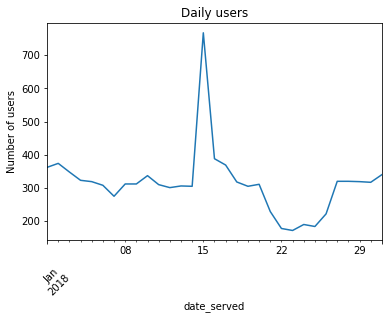

In [12]:
# Visualize daily marketing reach

daily_users.plot()

plt.title('Daily users')
plt.ylabel('Number of users')

plt.xticks(rotation = 45)

plt.show()  

In [13]:
# Number of people marketed 

total =data['user_id'].nunique()

# Number of people who subscribed
subscribers = data[data["converted"] == True]\
                       ['user_id'].nunique()

# Conversion rate
conversion_rate = subscribers/total
print(round(conversion_rate*100, 2), "%")

13.89 %


In [14]:
# Number of subscribers
total_subscribers = data[data["converted"] == True]\
                            ['user_id'].nunique()

# Number of people who remained subscribed
retained = data[data['is_retained'] == True]\
                   ['user_id'].nunique()
  
retention_rate = retained/total_subscribers
print("Retention Rate", round(retention_rate*100, 2), "%") 

# English speakers
english_speaker = data[data['language_displayed'] == 'English']
total = english_speaker['user_id'].nunique()
subscribers = english_speaker[english_speaker['converted'] == True]\
['user_id'].nunique()

# Conversion rate English
conversion_rate = subscribers/total
print('English speaker conversion rate:',  round(conversion_rate*100,2), '%')

Retention Rate 66.8 %
English speaker conversion rate: 12.92 %


In [15]:
# Conversion rate by language 
total = data.groupby('language_displayed')['user_id'].nunique()

subscribers = data[data['converted'] == True]\
              .groupby(['language_displayed'])\
              ['user_id'].nunique()

language_conversion_rate = subscribers/total
print(language_conversion_rate)

language_displayed
Arabic     0.500000
English    0.129167
German     0.716216
Spanish    0.200000
Name: user_id, dtype: float64


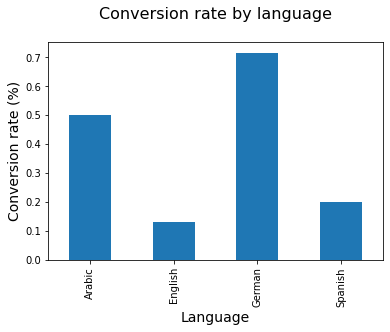

In [16]:
# Bar chart language_conversion_rate 
language_conversion_rate.plot(kind ='bar')

plt.title('Conversion rate by language\n', size = 16)
plt.xlabel('Language', size = 14)
plt.ylabel('Conversion rate (%)', size = 14)

plt.show()  

In [17]:
total = data.groupby('date_served')['user_id'].nunique()

subscribers = data[data['converted']==True]\
              .groupby(['date_served'])\
              ['user_id'].nunique()

# Conversion rate per day
daily_conversion_rate = subscribers/total
print(daily_conversion_rate) 

date_served
2018-01-01    0.099448
2018-01-02    0.098930
2018-01-03    0.103448
2018-01-04    0.108359
2018-01-05    0.125392
2018-01-06    0.113636
2018-01-07    0.141818
2018-01-08    0.115385
2018-01-09    0.125000
2018-01-10    0.118694
2018-01-11    0.080645
2018-01-12    0.076412
2018-01-13    0.084967
2018-01-14    0.085246
2018-01-15    0.113429
2018-01-16    0.255155
2018-01-17    0.219512
2018-01-18    0.091195
2018-01-19    0.059016
2018-01-20    0.067524
2018-01-21    0.087336
2018-01-22    0.123596
2018-01-23    0.122093
2018-01-24    0.115789
2018-01-25    0.125000
2018-01-26    0.090090
2018-01-27    0.065625
2018-01-28    0.062500
2018-01-29    0.059561
2018-01-30    0.066246
2018-01-31    0.052941
Name: user_id, dtype: float64


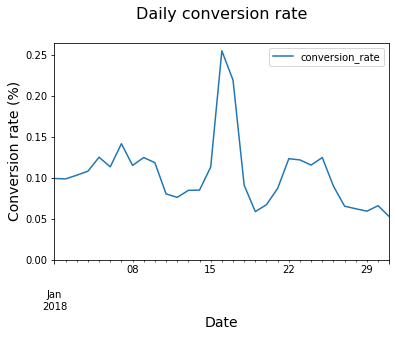

In [18]:
# Results into a DataFrame
daily_conversion_rate = pd.DataFrame(daily_conversion_rate.reset_index(0))
daily_conversion_rate.columns  
daily_conversion_rate.head()
daily_conversion_rate.columns = ['date_served','conversion_rate'] 

# Line chart daily_conversion_rate
daily_conversion_rate.plot('date_served','conversion_rate')

plt.title('Daily conversion rate\n', size = 16)
plt.ylabel('Conversion rate (%)', size = 14)
plt.xlabel('Date', size = 14)

plt.ylim(0)

plt.show()

In [19]:
total = data.groupby(['date_subscribed'])['user_id']\
            .nunique()

retained = data[data['is_retained'] == True]\
                .groupby(['date_subscribed'])\
                ['user_id'].nunique()

daily_retention_rate = retained/total
daily_retention_rate =pd.DataFrame(daily_retention_rate.reset_index())
daily_retention_rate.columns = ['date_subscribed','retention_rate']

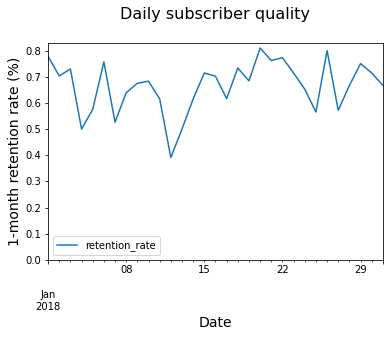

In [20]:
daily_retention_rate.plot('date_subscribed','retention_rate')

plt.title('Daily subscriber quality\n', size = 16)
plt.ylabel('1-month retention rate (%)', size = 14)
plt.xlabel('Date', size = 14)

plt.ylim(0)

plt.show()

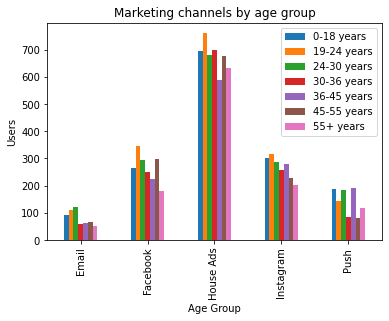

In [21]:
channel_age = data.groupby(['marketing_channel', 'age_group'])\
                                ['user_id'].count()

channel_age_df = pd.DataFrame(channel_age.unstack(level = 1)) 

channel_age_df.plot(kind = 'bar')
plt.title('Marketing channels by age group')
plt.xlabel('Age Group')
plt.ylabel('Users')

plt.legend(loc = 'upper right', 
           labels = channel_age_df.columns.values)
plt.show()

In [22]:
# Check chart
channel_age_df.head() 

age_group,0-18 years,19-24 years,24-30 years,30-36 years,36-45 years,45-55 years,55+ years
marketing_channel,,,,,,,
Email,93,111,120,60,63,65,53
Facebook,264,347,296,249,226,299,179
House Ads,694,761,681,699,589,678,631
Instagram,300,315,286,259,280,227,204
Push,186,145,183,86,193,82,118


In [23]:
retention_total =data.groupby(['date_subscribed','subscribing_channel'] )['user_id'].nunique() 

print(retention_total.head())

date_subscribed  subscribing_channel
2018-01-01       Email                   1
                 Facebook                8
                 House Ads              16
                 Instagram               8
                 Push                    3
Name: user_id, dtype: int64


In [24]:
retention_subs = data[data['is_retained'] == True]\
                           .groupby(['date_subscribed',
                                     'subscribing_channel'])\
                            ['user_id'].nunique()
retention_rate = retention_subs/retention_total

retention_rate_df = pd.DataFrame(retention_rate.unstack(level=1))


In [25]:
# Check chart
retention_rate_df.head() 

subscribing_channel,Email,Facebook,House Ads,Instagram,Push
date_subscribed,,,,,
2018-01-01,1.00,0.875000,0.687500,0.750000,1.000000
2018-01-02,0.75,1.000000,0.588235,0.625000,1.000000
2018-01-03,NaN,0.800000,0.647059,0.909091,0.666667
2018-01-04,0.50,0.666667,0.466667,0.500000,NaN
2018-01-05,1.00,0.571429,0.500000,0.636364,1.000000


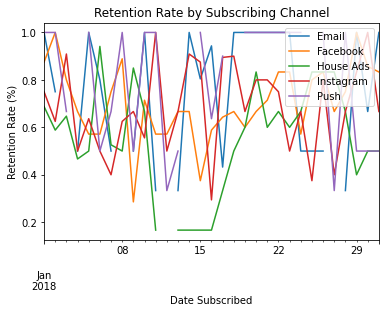

In [26]:
# Retention rate
retention_rate_df.plot()

plt.title('Retention Rate by Subscribing Channel')
plt.xlabel('Date Subscribed')
plt.ylabel('Retention Rate (%)')
plt.legend(loc = 'upper right', 
           labels = retention_rate_df.columns.values)
plt.show()  

In [27]:
subscribers = data[data['converted'] == True]\
               .groupby(['subscribing_channel'])\
               ['user_id'].nunique()
print(subscribers)

subscribing_channel
Email        161
Facebook     221
House Ads    298
Instagram    232
Push          77
Name: user_id, dtype: int64


In [28]:
retained = data[data['is_retained'] == True]\
            .groupby(['subscribing_channel'])\
            ['user_id'].nunique()
print(retained)

subscribing_channel
Email        141
Facebook     152
House Ads    173
Instagram    158
Push          54
Name: user_id, dtype: int64


In [29]:
channel_retention_rate = (retained/subscribers)*100
print(channel_retention_rate)

subscribing_channel
Email        87.577640
Facebook     68.778281
House Ads    58.053691
Instagram    68.103448
Push         70.129870
Name: user_id, dtype: float64


In [30]:
def conversion_rate(dataframe, column_names):
    # Total number of converted users
    column_conv = data[data['converted'] == True]\
                   .groupby(column_names)['user_id'].nunique()

    # Total number users
    column_total =  data.groupby(column_names)['user_id'].nunique()
    
    # Conversion rate 
    conversion_rate = column_conv/column_total
    
    conversion_rate = conversion_rate.fillna(0)
    return conversion_rate

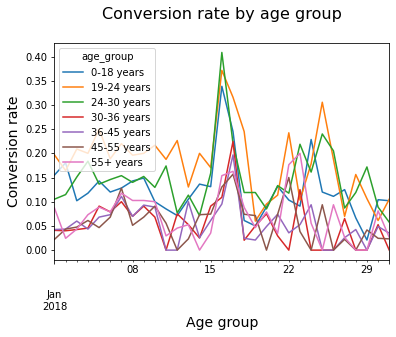

In [31]:
# Conversion rate by age_group 
age_group_conv = conversion_rate(data, ['date_served',
                                             'age_group'])

age_group_df = pd.DataFrame(age_group_conv.unstack(level = 1))

age_group_df.plot()
plt.title('Conversion rate by age group\n', size = 16)
plt.ylabel('Conversion rate', size = 14)
plt.xlabel('Age group', size = 14)
plt.show()

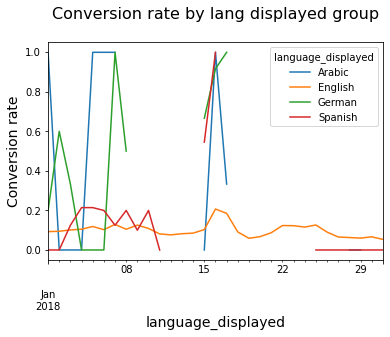

In [32]:
# Conversion rate by language displayed 

lang_group_conv = conversion_rate(data, ['date_served',
                                             'language_displayed'])

lang_group_df = pd.DataFrame(lang_group_conv.unstack(level = 1))

lang_group_df.plot()
plt.title('Conversion rate by lang displayed group\n', size = 16)
plt.ylabel('Conversion rate', size = 14)
plt.xlabel('language_displayed', size = 14)
plt.show()

In [33]:
Facebook = data\
            [data['marketing_channel'] == 'Facebook']

Facebook['is_correct_lang'] = np.where(
    Facebook['language_preferred'] == Facebook['language_displayed'], 
    'Yes', 
    'No')

language_check = Facebook.groupby(['date_served','is_correct_lang'])['is_correct_lang'].count()

language_check_df = pd.DataFrame(language_check.unstack(level=1)).fillna(0)

print(language_check_df)

is_correct_lang   No   Yes
date_served               
2018-01-01       0.0  69.0
2018-01-02       1.0  63.0
2018-01-03       0.0  63.0
2018-01-04       0.0  66.0
2018-01-05       0.0  64.0
2018-01-06       0.0  64.0
2018-01-07       0.0  52.0
2018-01-08       0.0  67.0
2018-01-09       0.0  59.0
2018-01-10       1.0  63.0
2018-01-11       0.0  58.0
2018-01-12       1.0  62.0
2018-01-13       0.0  63.0
2018-01-14       0.0  57.0
2018-01-15       0.0  67.0
2018-01-16       0.0  70.0
2018-01-17       1.0  68.0
2018-01-18       2.0  65.0
2018-01-19       1.0  61.0
2018-01-20       2.0  64.0
2018-01-21       2.0  48.0
2018-01-22       3.0  37.0
2018-01-23       0.0  36.0
2018-01-24       0.0  41.0
2018-01-25       0.0  36.0
2018-01-26       3.0  40.0
2018-01-27       1.0  66.0
2018-01-28       2.0  66.0
2018-01-29       2.0  61.0
2018-01-30       1.0  64.0
2018-01-31       1.0  76.0


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


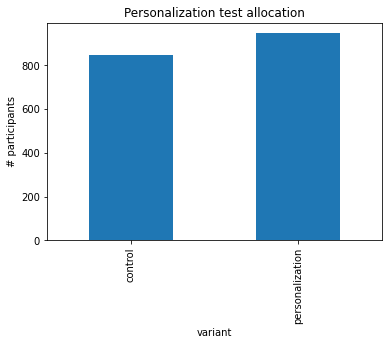

In [34]:

df_facebook = data[data['marketing_channel'] == 'Facebook']

alloc = df_facebook.groupby(['variant'])['user_id'].nunique()

alloc.plot(kind='bar')
plt.title('Personalization test allocation')
plt.ylabel('# participants')
plt.show()

In [35]:
subscribers = df_facebook.groupby(['user_id', 
                             'variant'])['converted'].max()

subscribers_df = pd.DataFrame(subscribers.unstack(level=1)) 

control = subscribers_df['control'].dropna()

personalization = subscribers_df['personalization'].dropna()

print('Control conversion rate:', np.mean(control))
print('Personalization conversion rate:', np.mean(personalization))

Control conversion rate: 0.054373522458628844
Personalization conversion rate: 0.19027484143763213


In [36]:
def lift(a,b):
    # Calcuate the mean of a and b
    a_mean = np.mean(a)
    b_mean = np.mean(b)
    
    # Calculate the lift using a_mean and b_mean
    lift = (b_mean-a_mean)/a_mean
  
    return str(round(lift*100, 2)) + '%'
print(lift(control, personalization))      



249.94%


In [37]:
from scipy.stats import ttest_ind

t = ttest_ind(control, personalization)
print(t) 


Ttest_indResult(statistic=-8.832725626815982, pvalue=2.3838113167820537e-18)
